# A notebook to plot the results of the Fluent simulations

In [ ]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import imageio.v2 as imageio

In [ ]:
# import data

# load data
xy_folder = r"C:\Temp\CFD\tutorial 3\Fluent Files\\"
xylist = [f for f in os.listdir(xy_folder) if f.startswith('external_cylinder_lines')]
#print(xylist)
pd_struc=[]

for i in tqdm(range(0, len(xylist))):
    temp = pd.read_csv(xy_folder + xylist[i], delim_whitespace=True)
    temp['magnitude'] = np.sqrt(temp['x-velocity']**2 + temp['y-velocity']**2 )
    temp['direction'] = np.arctan2(temp['y-velocity'], temp['x-velocity'])
    pd_struc.append(temp)


In [ ]:
temp = pd.read_csv(xy_folder + xylist[0], delim_whitespace=True)
temp['magnitude'] = np.sqrt(temp['x-velocity']**2 + temp['y-velocity']**2 )
temp.head()

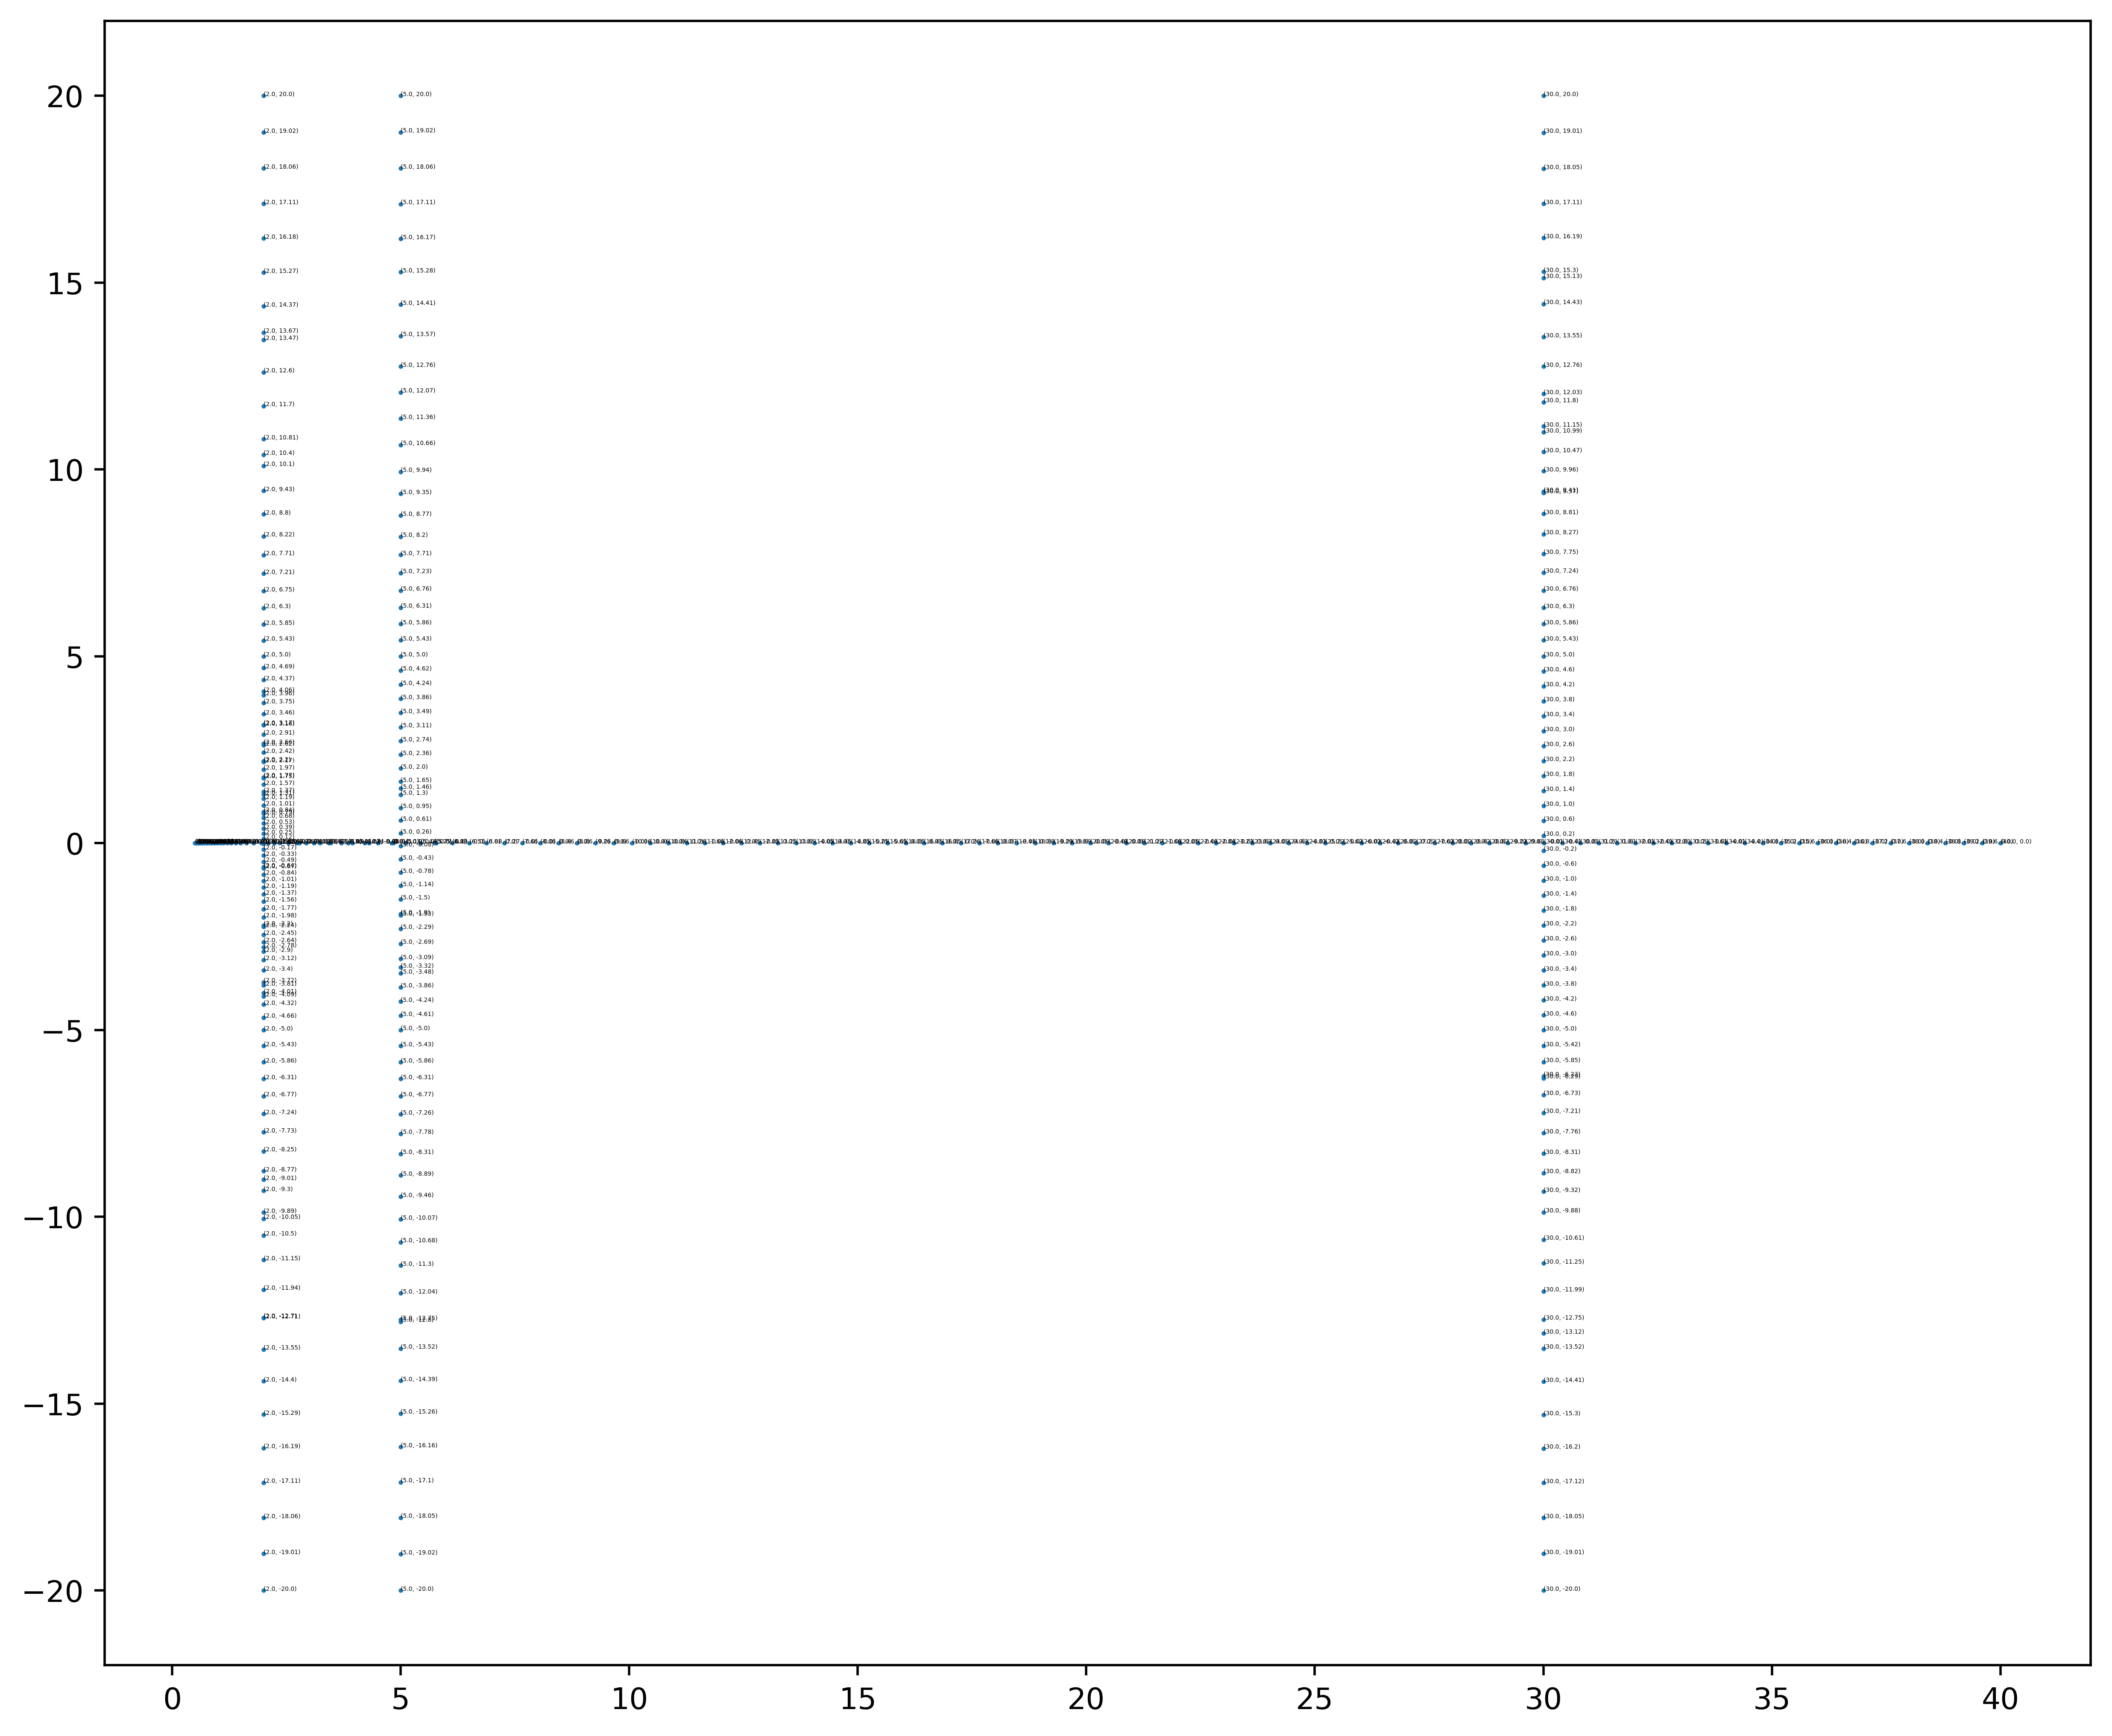

In [74]:
#set the figure size 
plt.figure(figsize=(12,10), dpi=500)

plt.plot(temp['x-coordinate'], temp['y-coordinate'], '.', markersize=1)

# coordinates precision is 2 decimal places
for i in range(0, len(temp)):
    plt.text(temp['x-coordinate'][i], temp['y-coordinate'][i], str((round(temp['x-coordinate'][i], 2), round(temp['y-coordinate'][i], 2))), fontsize=2)
plt.show()


In [ ]:
# plot velocity arrows on 2D plot

plt.figure(figsize=(8,6), dpi=300)

plt.quiver(temp['x-coordinate'], temp['y-coordinate'], temp['x-velocity'], temp['y-velocity'],temp['magnitude'],cmap='Reds', scale=50, width=0.0015, headwidth=3, headlength=4, headaxislength=5)

plt.show()
# save the figure
output_dir = r"c:\Temp\CFD\tutorial 3\Fluent Files"
#plt.savefig(output_dir + 'velocity_arrows.png', dpi=300, bbox_inches='tight')


In [ ]:

for i in tqdm(range(0, len(xylist))):
    temp = pd.read_csv(xy_folder + xylist[i], delim_whitespace=True)
    temp['magnitude'] = np.sqrt(temp['x-velocity']**2 + temp['y-velocity']**2 )
    
    fig = plt.figure(figsize=(8,6), dpi=300)

    plt.title('Velocity field', fontsize=10)

    plt.text(34, 20, 'Timestep: ' + xylist[i][-4:], fontsize=10)

    im = plt.quiver(temp['x-coordinate'], temp['y-coordinate'], temp['x-velocity'], temp['y-velocity'],temp['magnitude'],cmap='Reds', scale=40, width=0.002, headwidth=3, headlength=4, headaxislength=5)
    
    plt.savefig(xy_folder  +xylist[i]+ '_velocity.png', dpi=500, bbox_inches='tight')
 

    plt.close()


In [ ]:
# combine all the png files to a gif file via imageio package

png_files = [f for f in os.listdir(output_dir) if f.endswith('.png')]

images = []
for file_name in tqdm(png_files):
    file_path = os.path.join(output_dir, file_name)
    images.append(imageio.imread(file_path))
imageio.mimsave(output_dir+ '\\' + 'velocity.gif', images, duration=0.15)

In [ ]:
imageio.mimsave(output_dir+ '\\' + 'velocity.mp4', images, fps=10)

In [76]:


for i in tqdm(range(0, len(pd_struc))):

#for i in tqdm(range(2)):
    #select the x-coordinate = 2.0 to plot the velocity profile

    temp = pd_struc[i]
    temp[temp['x-coordinate'] == 2.0]
    line2p0 = temp[np.abs(temp['x-coordinate'] - 5.0)< 0.0001]
    figure = plt.figure(figsize=(4,8), dpi=300)
    plt.plot( line2p0['x-velocity'],line2p0['y-coordinate'], label='timestep: ' +  xylist[i][-4:])
    plt.legend(loc='upper left')
    plt.xlabel('x-velocity')
    plt.ylabel('y-coordinate')
    plt.title('Velocity profile')

    plt.xlim(-.1, 1.3)
    
    plt.savefig(xy_folder+'\\profile_5\\'  +xylist[i]+ '_x-velocity_profile.png', dpi=300, bbox_inches='tight')
    
    plt.close()


100%|██████████| 138/138 [01:04<00:00,  2.13it/s]


In [77]:
# combine all the png files to a gif file via imageio package
profile_dir = r"c:\Temp\CFD\tutorial 3\Fluent Files\profile_5\\"
png_files = [f for f in os.listdir(profile_dir) if f.endswith('.png')]

images = []
for file_name in tqdm(png_files):
    file_path = os.path.join(profile_dir, file_name)
    images.append(imageio.imread(file_path))
imageio.mimsave(profile_dir + '\\' + 'profile_5.gif', images, duration=0.15)

100%|██████████| 138/138 [00:10<00:00, 12.90it/s]


In [116]:
#

x_velcoity = []
y_velcoity = []
timeax = []
for i in tqdm(range(0, len(pd_struc))):
    

#for i in tqdm(range(2)):
    #select the x-coordinate = 2.0 to plot the velocity profile

    temp = pd_struc[i]
    temp[temp['x-coordinate'] == 2.0]
    line5p0 = temp[np.abs(temp['x-coordinate'] - 2.0)< 0.0001]
    x_velcoity.append(line5p0['x-velocity'])
    y_velcoity.append(line5p0['y-velocity'])
    timeax.append(xylist[i][-4:])

line5p0
timeax = [int(i) for i in timeax]
    

100%|██████████| 138/138 [00:00<00:00, 1150.24it/s]


In [91]:
np.array(x_velcoity).shape

(138, 106)

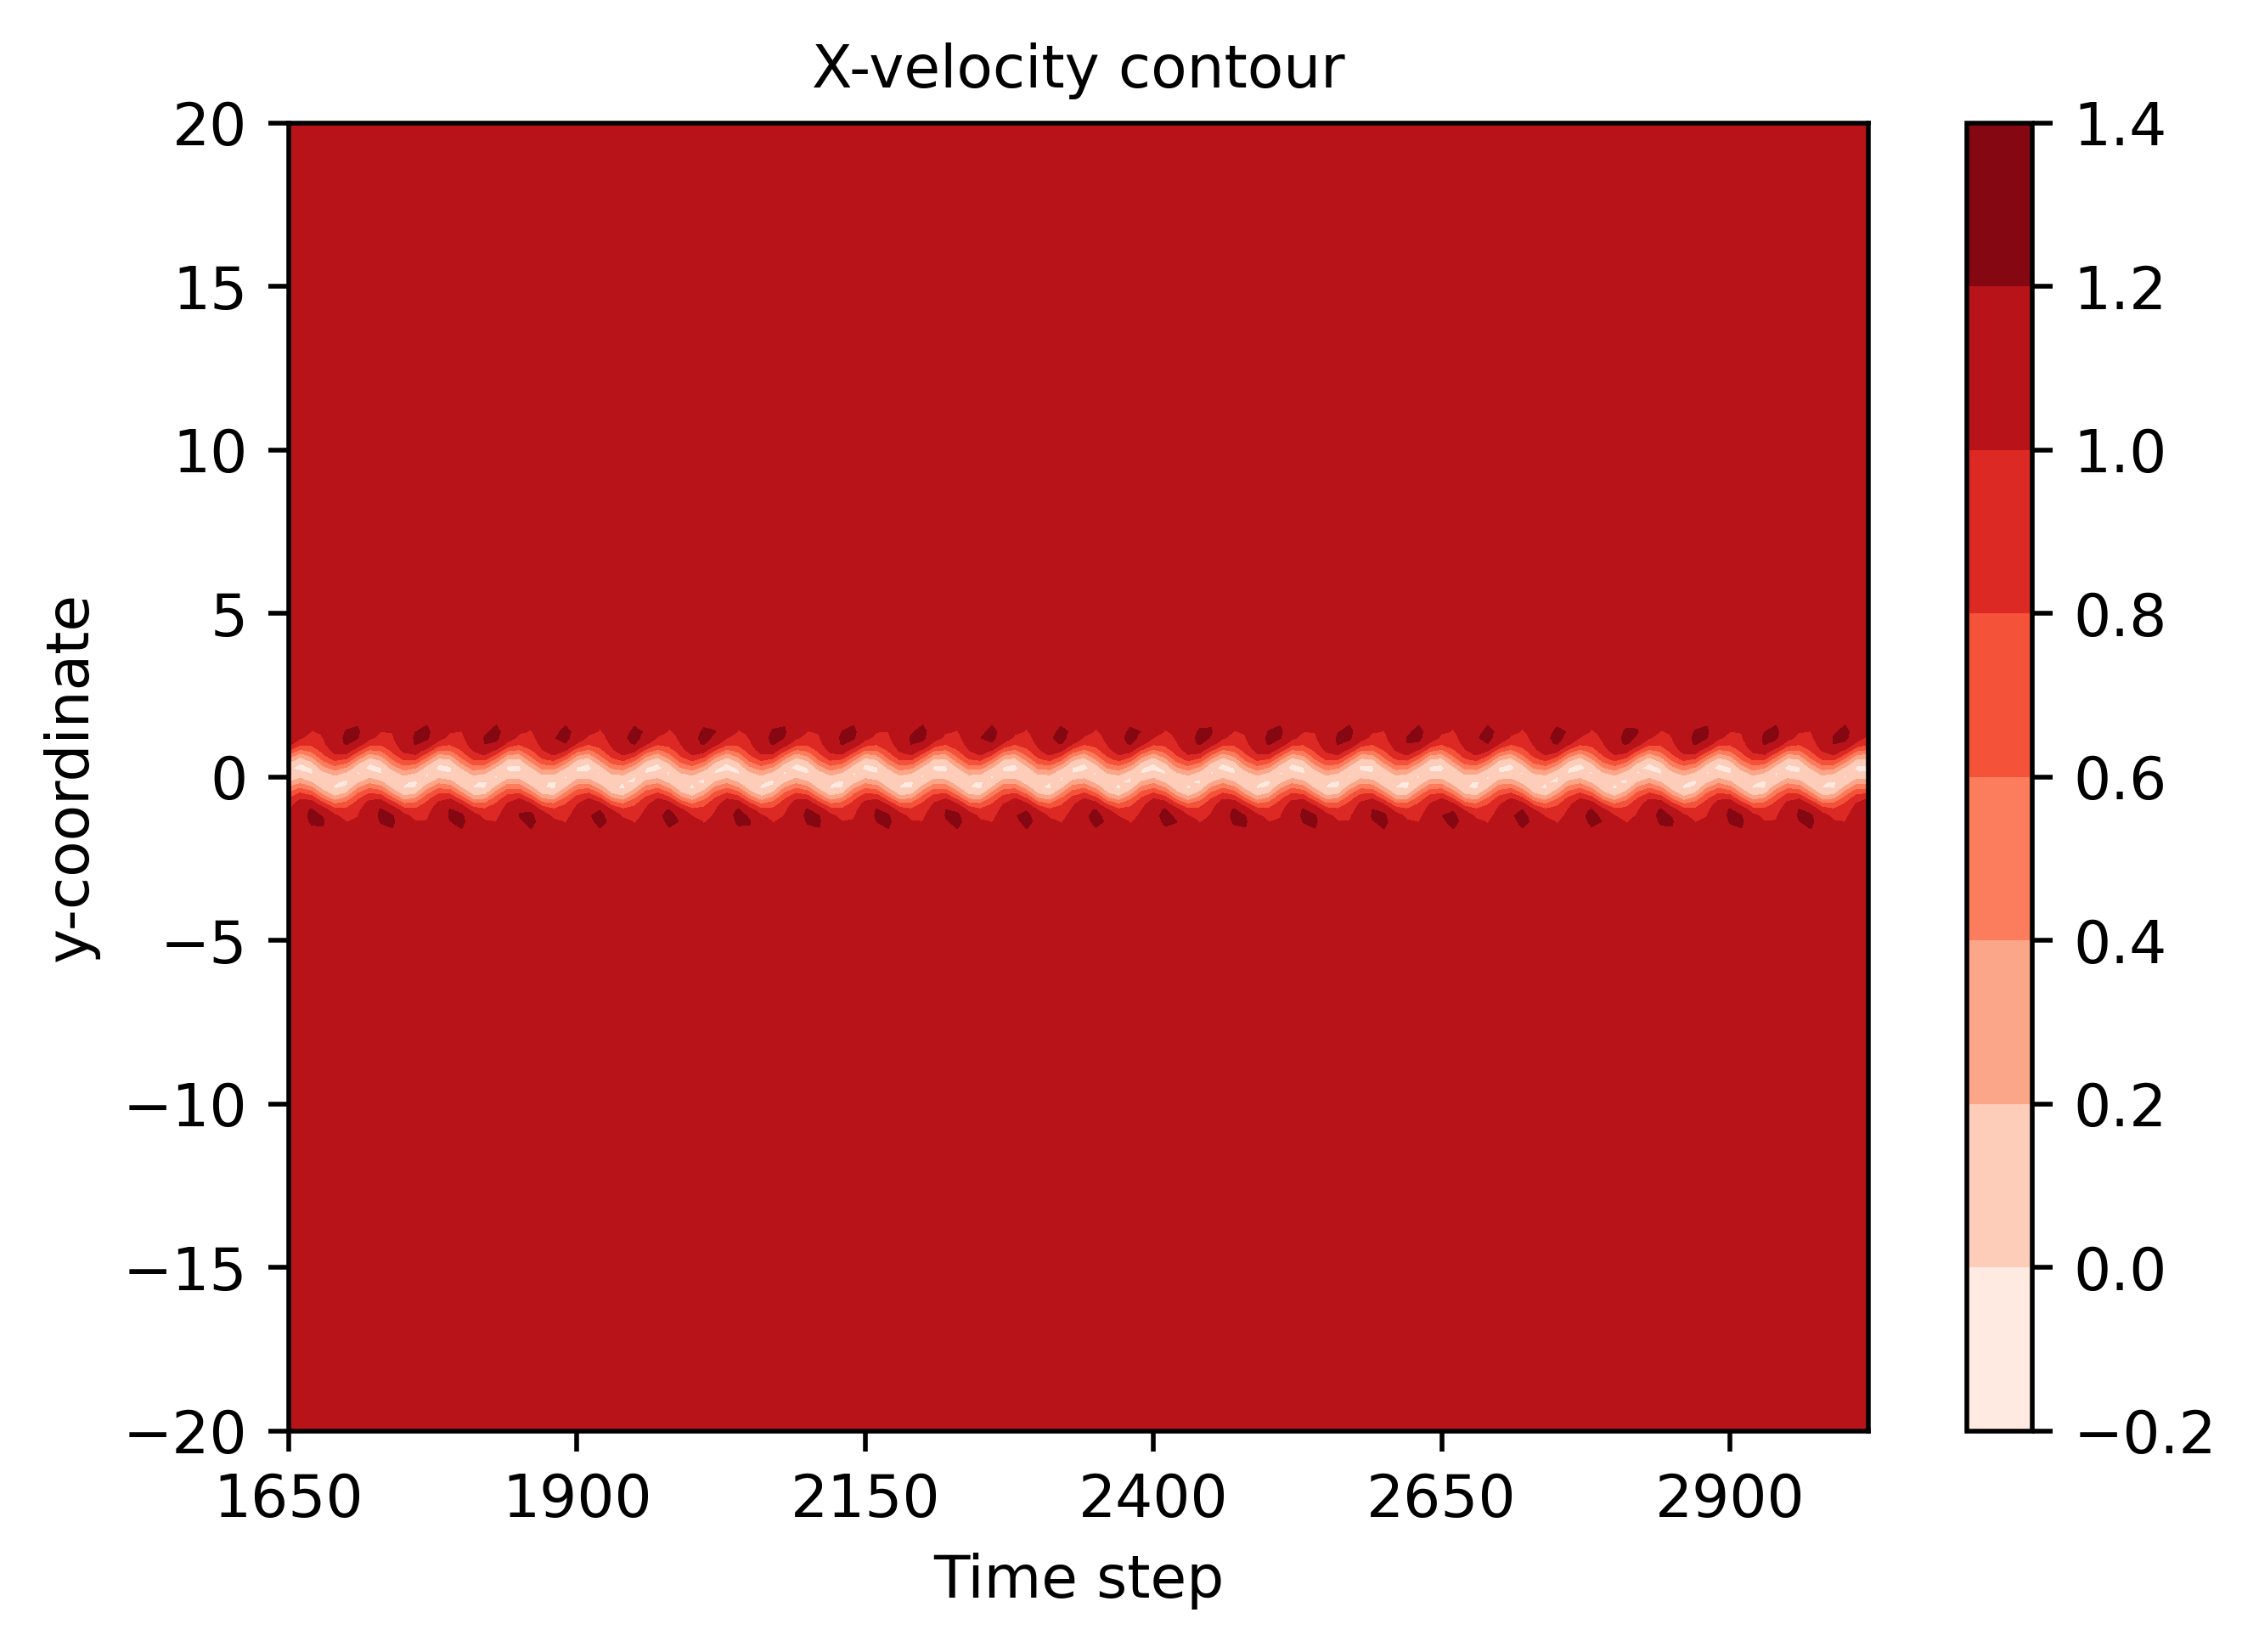

In [118]:

ycoords = line5p0['y-coordinate']



# plot contour of velocity magnitude, x axis is time, y axis is y-coordinate

# set the figure size
plt.figure(figsize=(6,4), dpi=500)

# set the title
plt.title('X-velocity contour', fontsize=10)

# set the x and y labels
plt.xlabel('Time step', fontsize=10)
plt.ylabel('y-coordinate', fontsize=10)

# plot the contour
plt.xticks(np.arange(min(timeax), max(timeax), 250))
plt.contourf(timeax, ycoords, np.transpose(np.array(x_velcoity)), cmap='Reds')
# plot legend
plt.colorbar()


# set the x ticks less dense




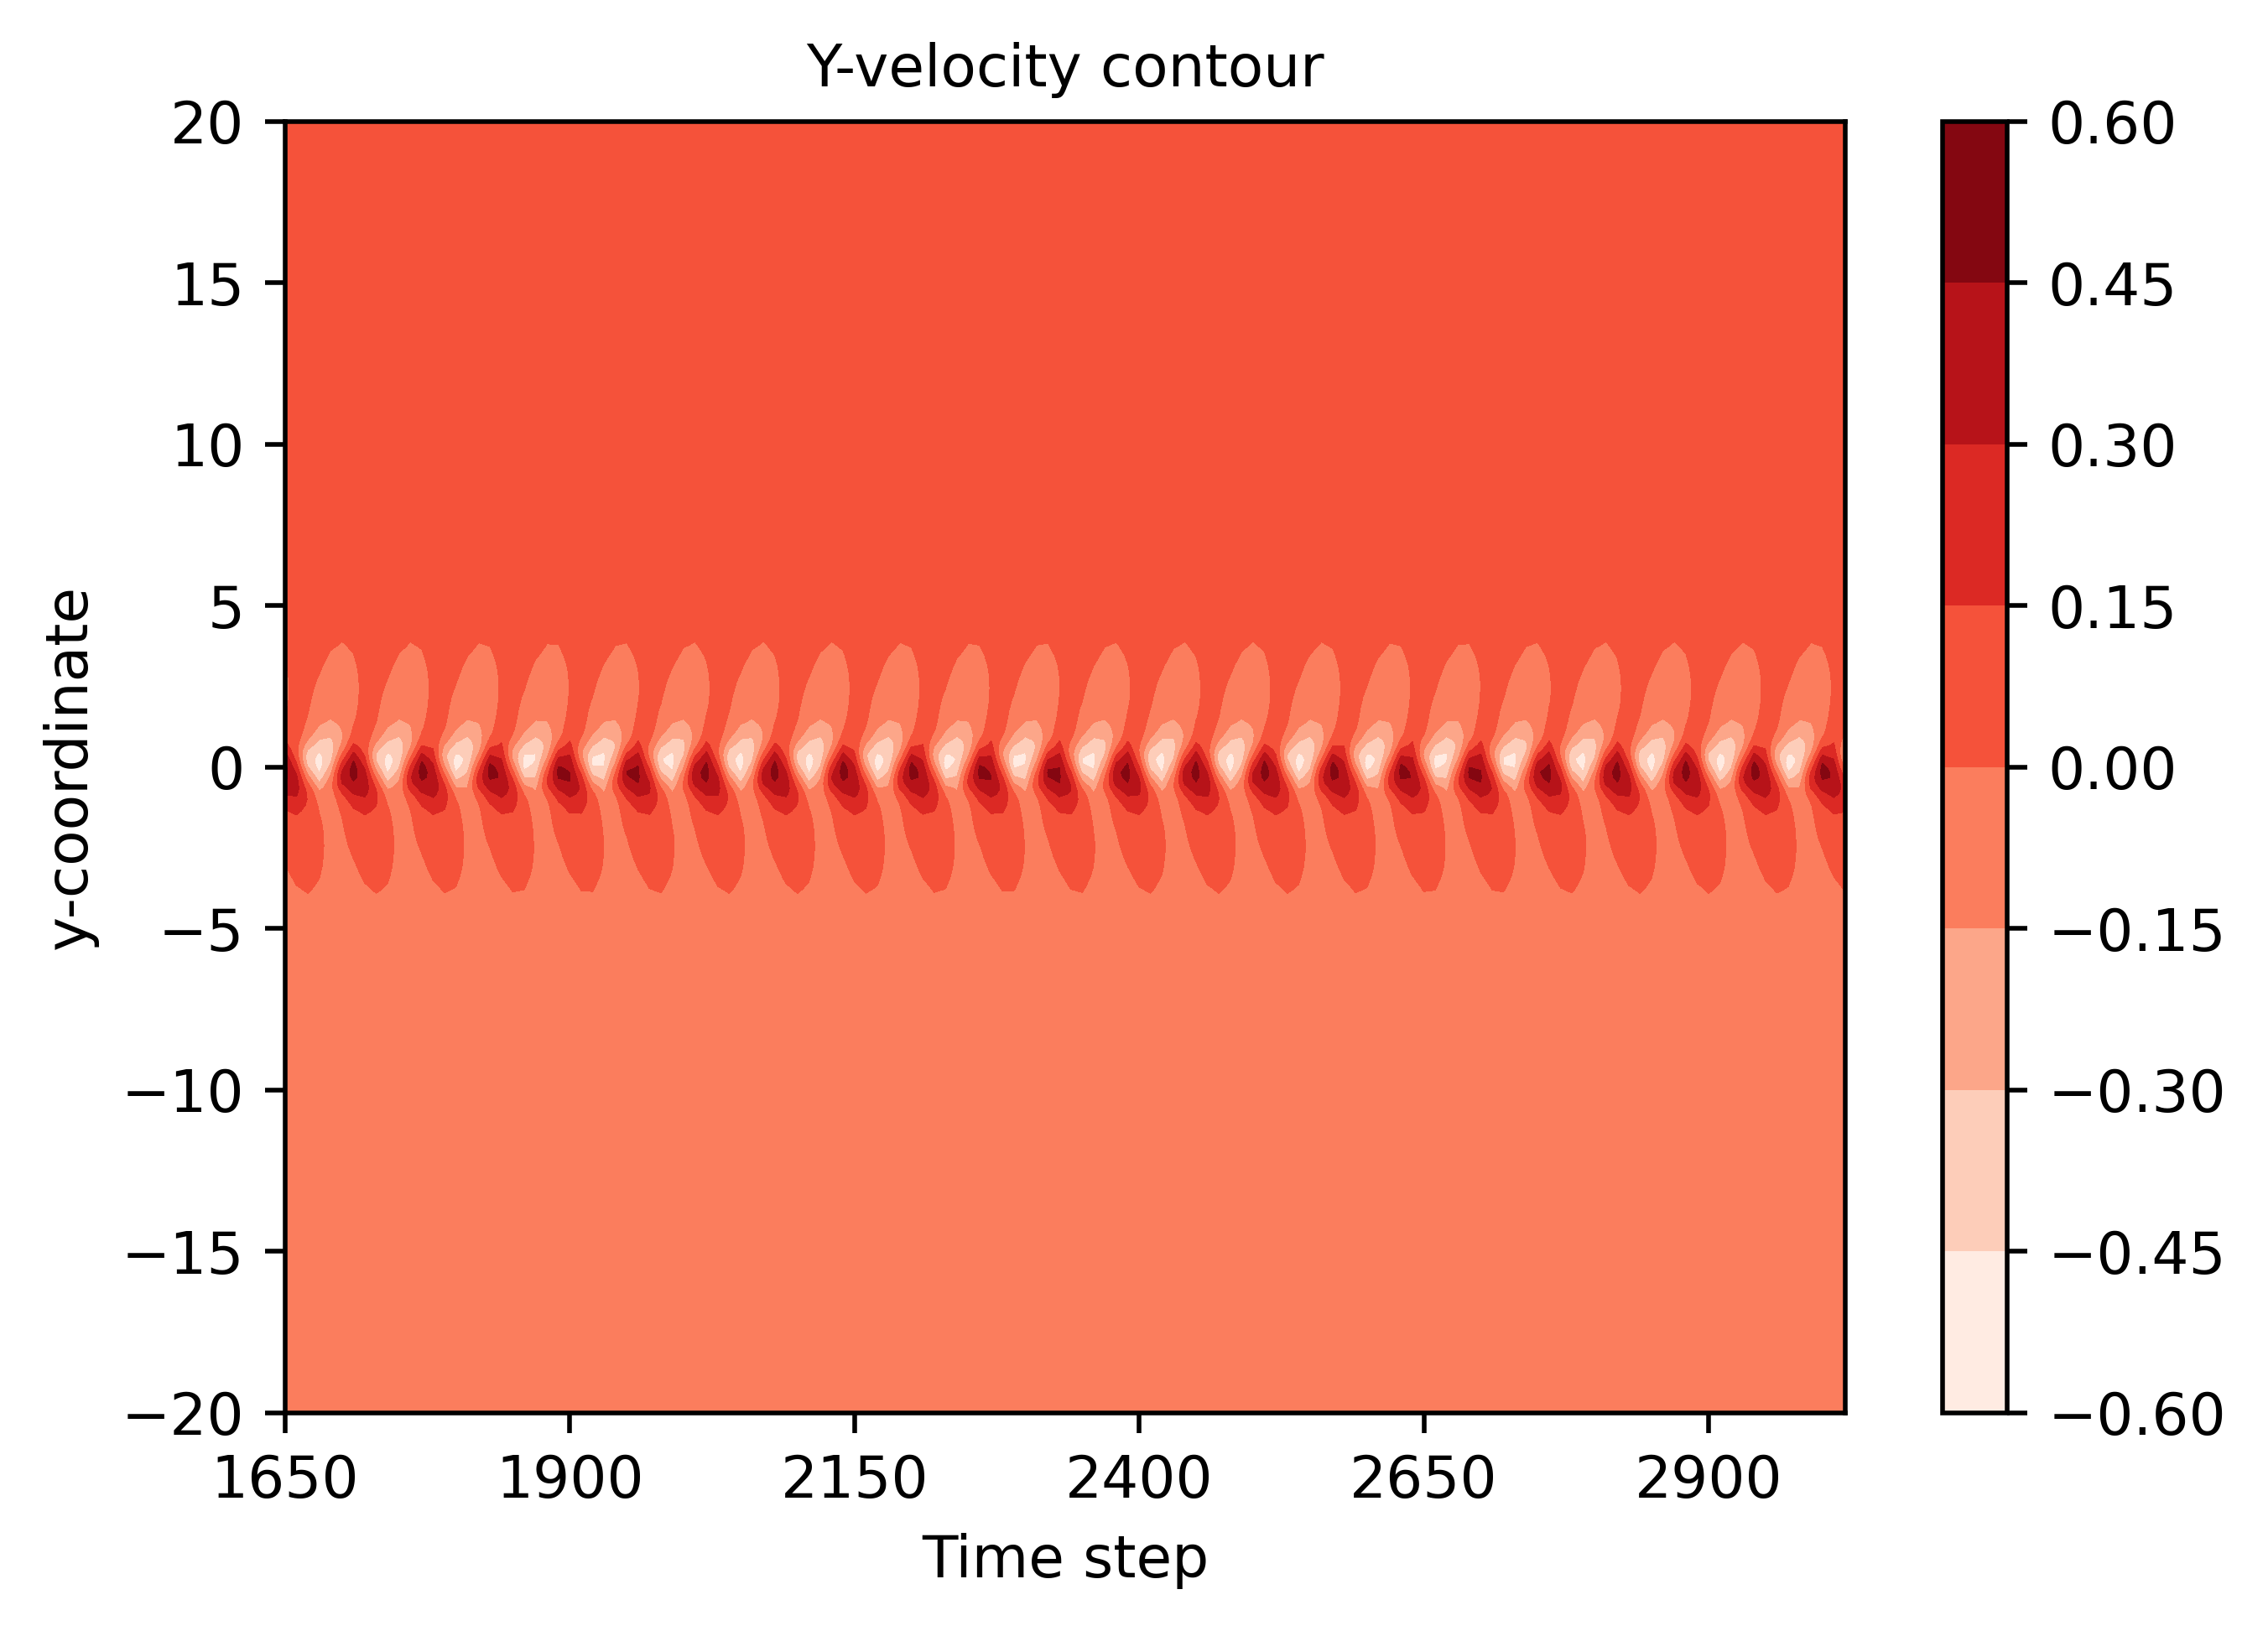

In [119]:

ycoords = line5p0['y-coordinate']



# plot contour of velocity magnitude, x axis is time, y axis is y-coordinate

# set the figure size
plt.figure(figsize=(6,4), dpi=500)

# set the title
plt.title('Y-velocity contour', fontsize=10)

# set the x and y labels
plt.xlabel('Time step', fontsize=10)
plt.ylabel('y-coordinate', fontsize=10)

# plot the contour
plt.xticks(np.arange(min(timeax), max(timeax), 250))
plt.contourf(timeax, ycoords, np.transpose(np.array(y_velcoity)), cmap='Reds')
# plot legend
plt.colorbar()


# set the x ticks less dense


